# Differentiating Texture with an Entropy Filter

In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import rectangle

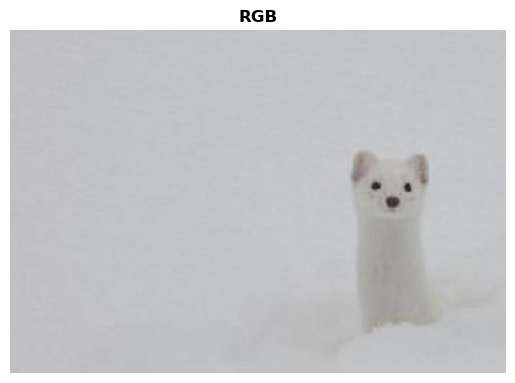

In [2]:
snow = cv2.imread("./images/snow.jpg")
snow = cv2.cvtColor(snow, cv2.COLOR_BGR2RGB)

plt.imshow(snow)
plt.title('RGB')
plt.axis('off')
plt.show()

The animal is camouflaged in the snow. We will segment it using the difference in texture between the snow and the fur.

In [3]:
snow_gray = cv2.cvtColor(snow, cv2.COLOR_RGB2GRAY)

First create filtered images using the standard deviation and range filters.

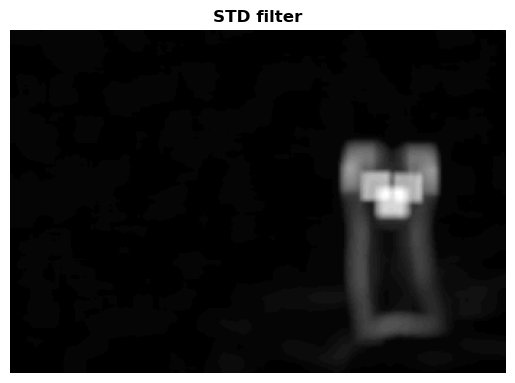

In [4]:
snow_std = generic_filter(snow_gray, np.std, size=19)

plt.imshow(snow_std, cmap='gray')
plt.title('STD filter')
plt.axis('off')
plt.show()

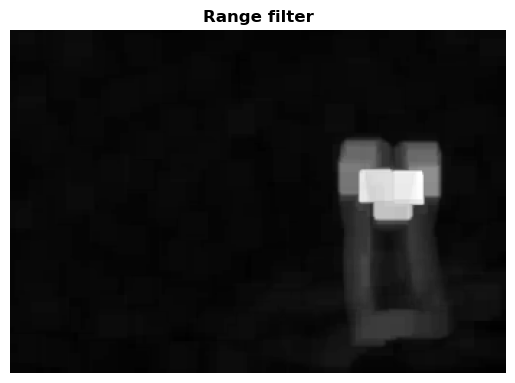

In [5]:
# http://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f
snow_range = cv2.morphologyEx(snow_gray, cv2.MORPH_GRADIENT, kernel=cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(19, 19)))

plt.imshow(snow_range, cmap='gray')
plt.title('Range filter')
plt.axis('off')
plt.show()

Range and standard deviation filters picked up similar features of the animal—the eyes and outline. That is because both of these filters look at how much the pixels are changing in a neighborhood. The entropy filter, in contrast, looks for patterns, or lack of patterns.

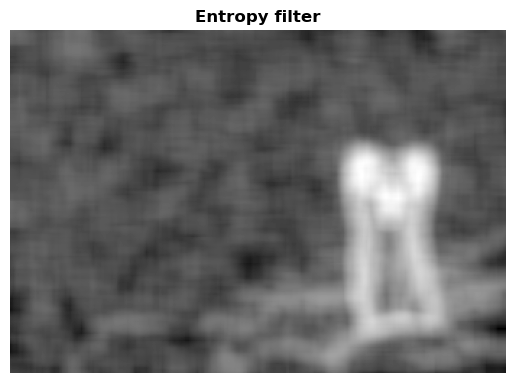

In [6]:
# https://scikit-image.org/docs/stable/api/skimage.filters.rank.html#skimage.filters.rank.entropy
snow_entropy = entropy(snow_gray, rectangle(19, 19))

plt.imshow(snow_entropy, cmap='gray')
plt.title('Entropy filter')
plt.axis('off')
plt.show()